# Jupyter Notebook: Parsing CSV and Visualizing Data

In this notebook, we will load a CSV file, convert it to a pandas DataFrame, and then create visualizations using seaborn & matplotlib

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting graphs

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

<ipython-input-2-75ab99035214>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # for data manipulation


## Step 1: Load CSV File and Parse Data

In [3]:
# Load the CSV file into a pandas DataFrame
file_path = 'Smoky-Hill-Library-PM25.csv'  # Update with actual path to the file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
df.head()

,date,min,max,median,q1,q3,stdev,count
0,2024-08-13T00:00:00.000Z,4.43,9.56,5.71,4.76,7.00,1.533,10
1,2024-08-14T00:00:00.000Z,3.46,4.71,3.97,3.84,4.19,0.329,24
2,2024-08-15T00:00:00.000Z,3.70,4.84,4.09,4.00,4.29,0.246,24
3,2024-08-16T00:00:00.000Z,4.36,12.03,5.43,4.86,8.51,2.393,24
4,2024-08-17T00:00:00.000Z,3.14,6.14,5.15,3.45,5.65,1.058,24


## Step 2: Locate the Date, Min, Max, and Median Data

In [4]:
# Select relevant columns: date, min, max, median
date_min_max_median_df = df[['date', 'min', 'max', 'median']]

# Display the first few rows of the selected data
date_min_max_median_df.head(10)

,date,min,max,median
0,2024-08-13T00:00:00.000Z,4.43,9.56,5.71
1,2024-08-14T00:00:00.000Z,3.46,4.71,3.97
2,2024-08-15T00:00:00.000Z,3.70,4.84,4.09
3,2024-08-16T00:00:00.000Z,4.36,12.03,5.43
4,2024-08-17T00:00:00.000Z,3.14,6.14,5.15
5,2024-08-18T00:00:00.000Z,3.28,4.46,4.11
6,2024-08-19T00:00:00.000Z,3.87,4.91,4.15
7,2024-08-20T00:00:00.000Z,3.42,5.46,4.38
8,2024-08-21T00:00:00.000Z,3.29,4.58,4.03
9,2024-08-22T00:00:00.000Z,3.51,7.89,4.04


## Step 3: Calculate Summary Statistics

In [5]:
# Calculate summary statistics for min, max, and median columns
summary_stats = date_min_max_median_df[['min', 'max', 'median']].describe()

# Display the summary statistics
summary_stats

,min,max,median
count,37.000000,37.000000,37.000000
mean,4.798649,8.623243,6.268649
std,1.594134,4.013240,2.429551
min,3.140000,4.440000,3.620000
25%,3.510000,5.460000,4.150000
50%,4.210000,7.110000,5.560000
75%,5.190000,10.980000,8.270000
max,8.600000,19.320000,11.870000


## Step 3: Visualize the Data with Seaborn and Matplotlib

<ipython-input-6-61649a98b12e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_min_max_median_df['Date'] = pd.to_datetime(date_min_max_median_df['date'])


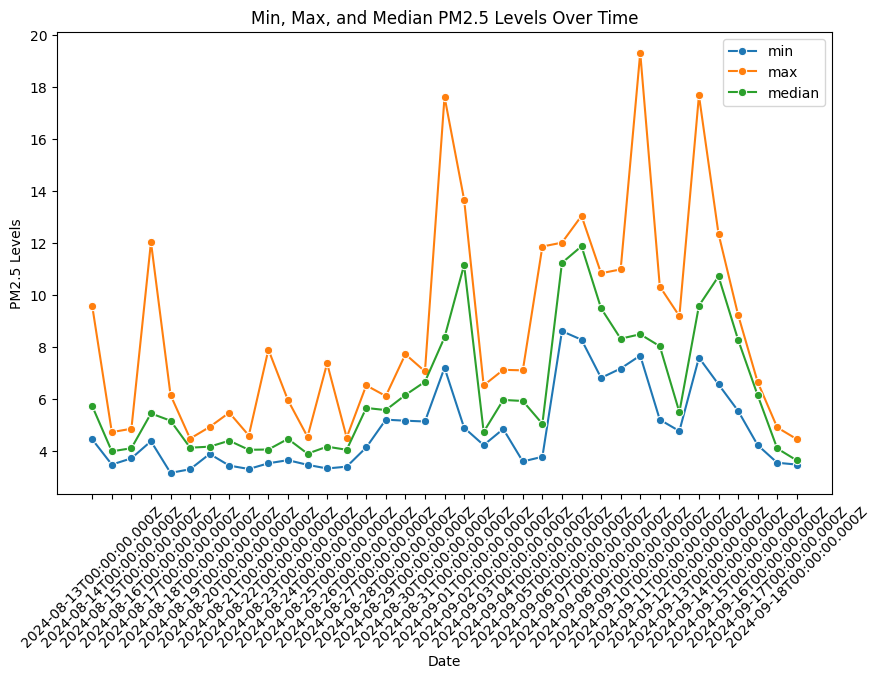

In [6]:
# Convert the Date column to datetime format
date_min_max_median_df['Date'] = pd.to_datetime(date_min_max_median_df['date'])

# Plot the Min, Max, and Median values over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='min', data=date_min_max_median_df, marker='o', label='min')
sns.lineplot(x='date', y='max', data=date_min_max_median_df, marker='o', label='max')
sns.lineplot(x='date', y='median', data=date_min_max_median_df, marker='o', label='median')
plt.title('Min, Max, and Median PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

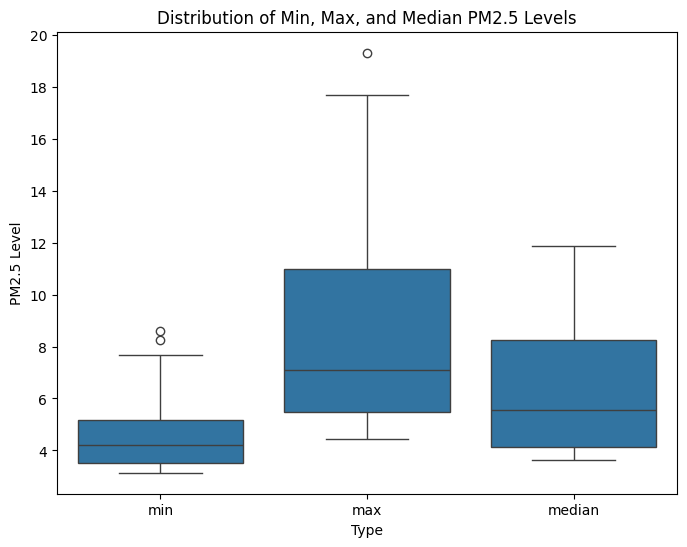

In [9]:
# Melt the data for easier plotting with seaborn
melted_df = date_min_max_median_df.melt(id_vars='Date', value_vars=['min', 'max', 'median'], var_name='Type', value_name='PM2.5 Level')

# Create a box plot for Min, Max, and Median values
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='PM2.5 Level', data=melted_df)
plt.title('Distribution of Min, Max, and Median PM2.5 Levels')
plt.xlabel('Type')
plt.ylabel('PM2.5 Level')
plt.show()